<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

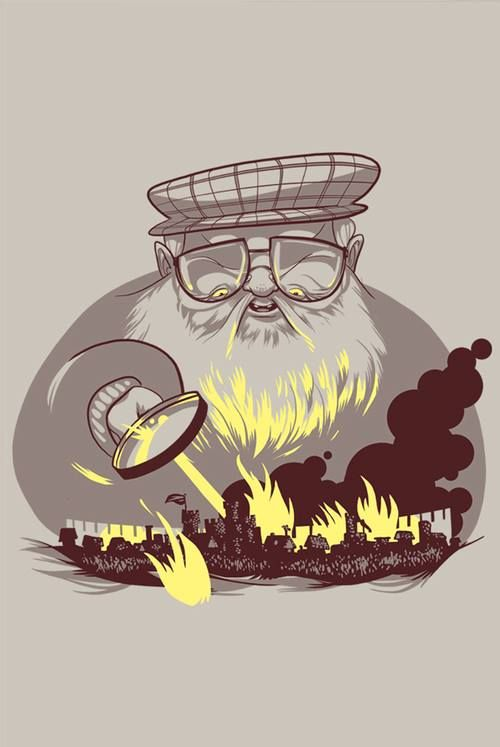

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [22]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 63.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 83.7MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [129]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data_test  = pd.read_csv('/content/game_of_thrones_test.csv',  index_col='S.No')

data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [130]:
def data_preprocessing(data):
  median_dateOfBirth = np.quantile(data['dateOfBirth'].dropna().values, q=0.5)
  # Заменяем NaN на медиану
  data['dateOfBirth'] = data['dateOfBirth'].fillna(median_dateOfBirth)

  median_age = np.quantile(data['age'].dropna().values, q=0.5)\
  # Заменяем NaN на медиану
  data['age'] = data['age'].fillna(median_dateOfBirth)

data_preprocessing(data)
data_preprocessing(data_test)

data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,0
mother,1539
father,1535
heir,1536
house,381
spouse,1357


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [131]:
def new_features(data):
  data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
  data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
  data.drop(columns=['numDeadRelations'], inplace=True)
new_features(data)
new_features(data_test)

In [132]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Создаем обратный словарь для быстрого поиска
reverse_cult = {variant: key for key, variants in cult.items() for variant in variants}

# Функция для замены культуры на общее название
def simplify_culture(culture):
    return reverse_cult.get(culture, culture)  # Если культура не найдена, оставляем как есть

# Применяем функцию к столбцу 'culture'
def culture_processing(data):
  data['culture'] = data['culture'].apply(simplify_culture)
  data['culture'] = data['culture'].fillna("noCulture")

culture_processing(data)
culture_processing(data_test)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [133]:
def drop_features(data):
  data.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', 'popularity',
                    'book1', 'book2', 'book3', 'book4', 'book5'], inplace = True)
  data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

drop_features(data)
drop_features(data_test)
data.isna().sum()

,0
title,840
male,0
culture,0
dateOfBirth,0
house,381
isMarried,0
isNoble,0
age,0
isAlive,0
isPopular,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

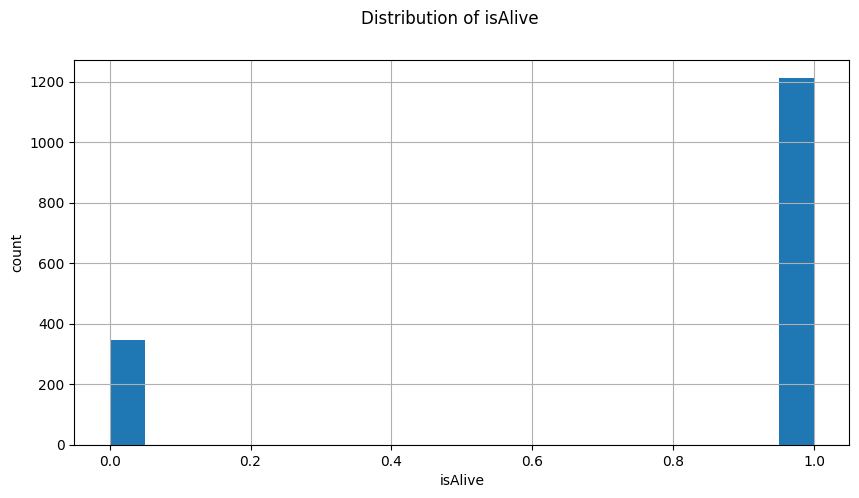

In [134]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of isAlive')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [135]:
# анализ категориальных признаков, сведение редких титулов и домов к единым классам
def titles_houses(data):
  data['title'] = data['title'].fillna('noTitle')
  title_counts = data['title'].value_counts()
  data['title'] = data['title'].apply(lambda x: x if title_counts[x] > 10 else 'rareTitle')

  data['house'] = data['house'].fillna('noHouse')
  house_counts = data['house'].value_counts()
  data['house'] = data['house'].apply(lambda x: x if house_counts[x] > 10 else 'rareHouse')

titles_houses(data)
titles_houses(data_test)

In [136]:
# кодировка категориальных призанков

from sklearn.preprocessing import OrdinalEncoder

cat_features = ['title', 'house', 'culture']

# Create a LabelEncoder object
encoding = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the categorical data

# for column in cat_features:
data[cat_features] = encoding.fit_transform(data[cat_features])

# for column in cat_features:
data_test[cat_features] = encoding.transform(data_test[cat_features])

data

# data[cat_features]

,title,male,culture,dateOfBirth,house,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,
1,6.0,1,48.0,272.0,13.0,0,0,272.0,0,1,1
2,7.0,1,31.0,208.0,3.0,1,1,97.0,1,1,1
3,4.0,1,48.0,272.0,14.0,0,1,272.0,1,0,0
4,7.0,0,48.0,82.0,1.0,1,1,23.0,0,0,0
5,7.0,0,7.0,276.0,14.0,1,1,29.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,1,48.0,272.0,13.0,0,1,272.0,1,0,0
1554,6.0,0,48.0,272.0,13.0,0,0,272.0,0,0,0
1555,6.0,1,48.0,272.0,14.0,0,0,272.0,0,0,0


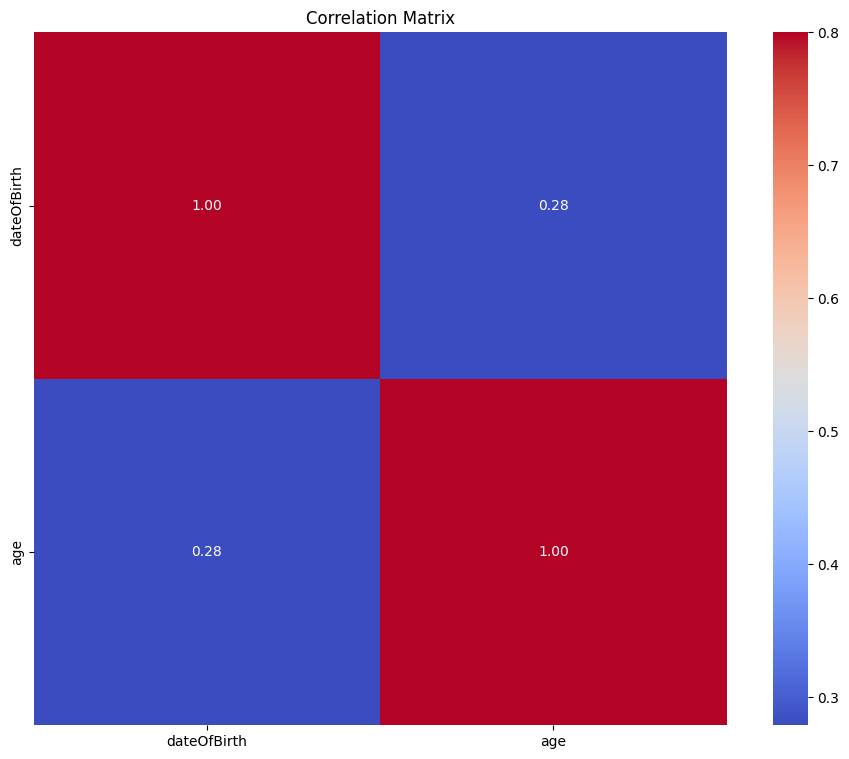

In [137]:
# анализ количественных призанков на предмет корелляции
corr_mat = data[['dateOfBirth', 'age']].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Из таблицы видно, что есть корелляция между возрастом и датой рождения, что логично. Один из этих признаков надо удалить. Удалим age (нет разницы что удалять так как там и там +- одиноковое количество пропуском в начальном датасете)


In [138]:
data.drop(columns=['age'], inplace=True)
data_test.drop(columns=['age'], inplace=True)


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

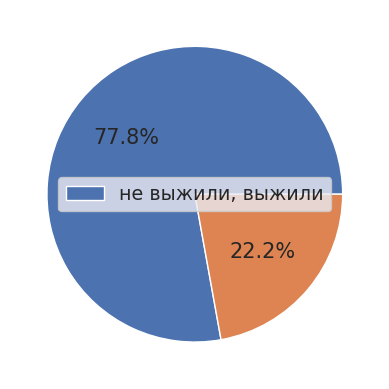

In [131]:
# Готовим данные для графика
dt = data['isAlive'].value_counts()

# Строим круговую диаграмму
plt.pie(dt, autopct='%1.1f%%')

plt.legend(['не выжили, выжили'])

plt.show()


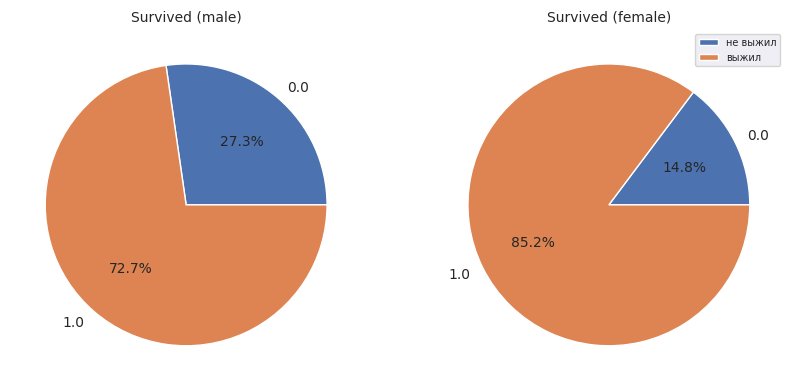

In [132]:
# female - 0, male - 1
data_1 = data[data['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

Видно, что процент выживших мужчин в два раза больше, чем женщин

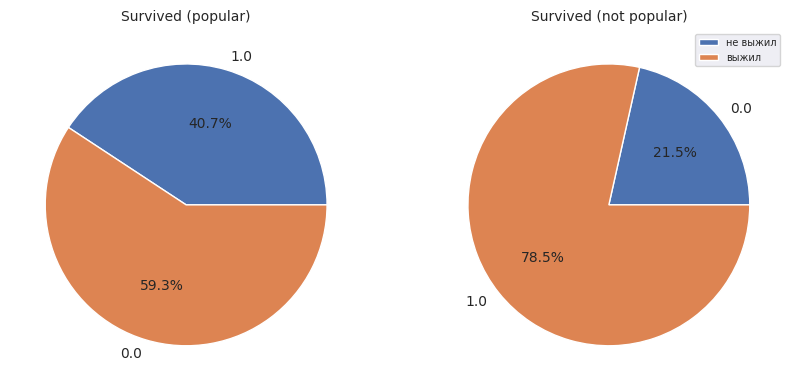

In [133]:
# not popular - 0, popular - 1
data_1 = data[data['isPopular']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isPopular']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (popular)', fontsize=10)
ax2.set_title('Survived (not popular)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

популярные персонажи выживают в два раза чаще чем не популярные

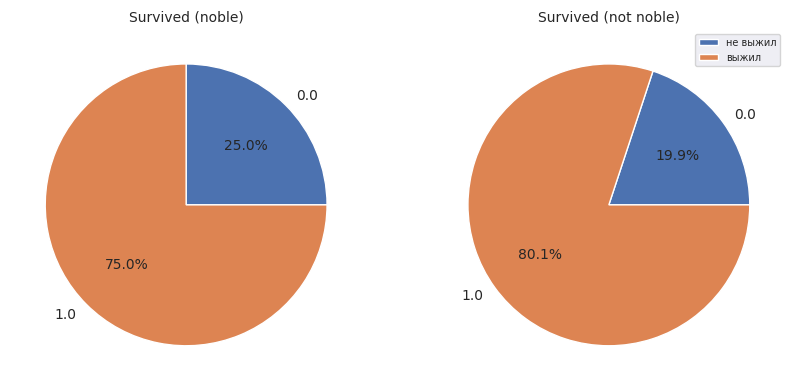

In [134]:
# not noble - 0, noble - 1
data_1 = data[data['isNoble']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isNoble']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (noble)', fontsize=10)
ax2.set_title('Survived (not noble)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

знатность практически не влияет на выживаемость

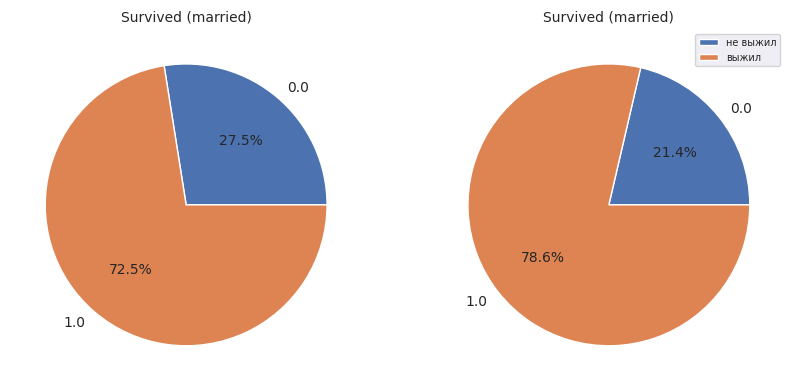

In [135]:
# not Married - 0, Married - 1
data_1 = data[data['isMarried']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isMarried']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (married)', fontsize=10)
ax2.set_title('Survived (married)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

семейный статус тоже практически не влияет

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [139]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [142]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [143]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tmp = X_train
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [61]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
# Параметры для RandomizedSearchCV
param_dist = {
    'C': loguniform(1e-4, 100),  # Логарифмическое распределение
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

# Создание модели LogisticRegression
log_reg = LogisticRegression()

# Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,  # Количество случайных комбинаций
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для LogisticRegression:", grid_search.best_params_)
best_LR = grid_search.best_estimator_


Лучшие параметры для LogisticRegression: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

**DecisionTreeClassifier**

In [145]:
# Параметры для настройки
param_grid = {
    'max_depth': [3, 5, 7, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Поиск по сетке
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Best Parameters:", grid_search.best_params_)

# Лучшая модель
DTC_best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}


**KNN**

In [146]:
# Определение параметров для перебора
param_grid = {
    'n_neighbors': range(1, 31),  # Количество соседей от 1 до 30
    'weights': ['uniform', 'distance'],  # Веса: равномерные или по расстоянию
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Метрики расстояния
}

# Создание модели KNN
knn = KNeighborsClassifier()

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Запуск GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

# Оценка на тестовой выборке
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print("Точность на тестовой выборке:", test_accuracy)

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'uniform'}
Лучшая точность: 0.8072289156626505
Точность на тестовой выборке: 0.8301282051282052


**RandomForest**

In [147]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_rf = grid_search.best_estimator_

**AdaBoostClassifier**

In [148]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# Создание модели AdaBoost
ada = AdaBoostClassifier()

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для AdaBoost:", grid_search.best_params_)
best_ada = grid_search.best_estimator_

Лучшие параметры для AdaBoost: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.0, 'n_estimators': 200}


**GaussianProcessClassifier**

In [38]:
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct
# Параметры для GridSearchCV
param_grid = {
    'kernel': [RBF(), Matern(), DotProduct()],
    'max_iter_predict': [100, 200, 300]
}

# Создание модели GaussianProcess
gpc = GaussianProcessClassifier()

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=gpc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для GaussianProcessClassifier:", grid_search.best_params_)
best_GPC = grid_search.best_estimator_

# Лучшие параметры для GaussianProcessClassifier: {'kernel': Matern(length_scale=1, nu=1.5), 'max_iter_predict': 100} (подбор идет очень долго)

Лучшие параметры для GaussianProcessClassifier: {'kernel': Matern(length_scale=1, nu=1.5), 'max_iter_predict': 100}


**GaussianNB**

In [149]:
# Параметры для GridSearchCV
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Создание модели GaussianNB
gnb = GaussianNB()

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для GaussianNB:", grid_search.best_params_)
best_gnb = grid_search.best_estimator_

Лучшие параметры для GaussianNB: {'var_smoothing': 1e-09}


**SVC (Support Vector Classifier)**

In [91]:
# Параметры для GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Создание модели SVC
svc = SVC()

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для SVC:", grid_search.best_params_)
best_SVC = grid_search.best_estimator_

KeyboardInterrupt: 

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [150]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [62]:
# Шаг 3. Предсказание на тестовых данных
LR_y_pred = best_LR.predict(X_test)

# # Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, LR_y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


**DecisionTreeClassifier**

In [151]:
# Шаг 3. Предсказание на тестовых данных
DTC_y_pred = DTC_best_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, DTC_y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8333


**KNN**

In [152]:
KNN_y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, KNN_y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8301


**RandomForest**

In [153]:
RF_y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, RF_y_pred))

Accuracy: 0.8333333333333334


Выберите лучшую модель.

**AdaBoostClassifier**

In [154]:
ADA_y_pred = best_ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, ADA_y_pred))


Accuracy: 0.8333333333333334


**GaussianProcessClassifier**

In [92]:
GPC_y_pred = best_GPC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, GPC_y_pred))

NameError: name 'best_GPC' is not defined

**GaussianNB**

In [155]:
GNB_y_pred = best_gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, GNB_y_pred))

Accuracy: 0.8173076923076923


Очень слабо. Данная модель не подходит для задачи из за того что признаки не имеют нормального распределения.

**SVC (Support Vector Classifier)**

In [47]:
SVC_y_pred = best_SVC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, SVC_y_pred))

Accuracy: 0.8076923076923077


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [156]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.41MB/s]


In [169]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [168]:
test = scaler.transform(data_test)
submission['isAlive'] = best_ada.predict(test)
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [167]:
submission.to_csv("/content/new_submission.csv", index=False)

**Итог** \\
Лучше всего себя паказал AdaBoostClassifier c accuracy ~ 0.7 на тестовой выборке
